In [3]:
from keras.layers import Dense
from keras import backend
import numpy as np

In [50]:
a = np.array([[[1,2,-3], [4,5,6]]])
b = np.array([[[1,2,-3], [4,5,6]]])
print(a.shape)
print(b.shape)
c=backend.concatenate([a, b], axis=2)
print(c.shape)
print(np.concatenate([a,b], axis=2))

(1, 2, 3)
(1, 2, 3)
(1, 2, 6)
[[[ 1  2 -3  1  2 -3]
  [ 4  5  6  4  5  6]]]


In [27]:
b = backend.tile(a, (9, 2))

In [32]:
c = backend.reshape(a, (1,1,6))
c = backend.tile(c, (2,3,7))

In [33]:
print(c.shape)


(2, 3, 42)


In [36]:
print("testing")
print(b.shape)

testing
(18, 6)


In [70]:
d = np.array([[[0],[-1],[2]], [[0], [-1],[8]]])
print(d.shape)
d = np.reshape(d,(2,1,3))
print(d.shape)
print(d)
e = np.stack((d,d), axis=2)
print(e.shape)
print(e)

(2, 3, 1)
(2, 1, 3)
[[[ 0 -1  2]]

 [[ 0 -1  8]]]
(2, 1, 2, 3)
[[[[ 0 -1  2]
   [ 0 -1  2]]]


 [[[ 0 -1  8]
   [ 0 -1  8]]]]


In [54]:
bn = backend.random_binomial((2,), [0.1,0.9])
print(bn.shape)
print(bn)
backend.sigmoid(0.1)

(2,)
Tensor("Select_2:0", shape=(2,), dtype=float32)


<tf.Tensor 'Sigmoid:0' shape=() dtype=float32>

In [74]:
a = np.array([[1,2,3],[0,-4,5]])
b = np.array([[-1,0,1],[0,7,-1]])
c = (lambda x, y: np.concatenate([x,y], axis=0))(a,b)
print(c.shape)
print(c)

(4, 3)
[[ 1  2  3]
 [ 0 -4  5]
 [-1  0  1]
 [ 0  7 -1]]


In [89]:
a = np.linspace(-1,1,10)
b = a ** 2
r = np.stack((a, b), axis=1)
C = np.dot(r.T, r)
D = np.dot(r, r.T)
print(C)
#print(D)
print(np.sum(a))
print(np.sum(b))
print(np.var(a))
print(np.var(b))

[[  4.07407407e+00  -4.44089210e-16]
 [ -4.44089210e-16   2.94741655e+00]]
-2.22044604925e-16
4.07407407407
0.407407407407
0.128760859625


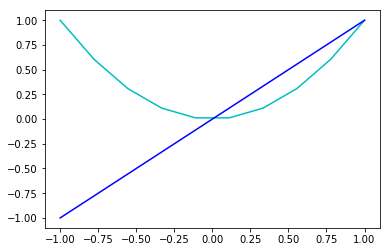

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a, b, color='c')
plt.plot(a, a, color='b')

In [91]:
def rvs(dim=3):
     random_state = np.random
     H = np.eye(dim)
     D = np.ones((dim,))
     for n in range(1, dim):
         x = random_state.normal(size=(dim-n+1,))
         D[n-1] = np.sign(x[0])
         x[0] -= D[n-1]*np.sqrt((x*x).sum())
         # Householder transformation
         Hx = (np.eye(dim-n+1) - 2.*np.outer(x, x)/(x*x).sum())
         mat = np.eye(dim)
         mat[n-1:, n-1:] = Hx
         H = np.dot(H, mat)
         # Fix the last sign such that the determinant is 1
     D[-1] = (-1)**(1-(dim % 2))*D.prod()
     # Equivalent to np.dot(np.diag(D), H) but faster, apparently
     H = (D*H.T).T
     return H

In [97]:
np.random.seed(7)
A=rvs()
print(A)
print(np.dot(A.T,A))

[[ 0.96388439 -0.1385483   0.22744507]
 [-0.26566278 -0.56021064  0.78459373]
 [ 0.01871302 -0.81668134 -0.57678541]]
[[  1.00000000e+00   2.18067375e-17  -3.28161282e-17]
 [  2.18067375e-17   1.00000000e+00  -1.08949919e-16]
 [ -3.28161282e-17  -1.08949919e-16   1.00000000e+00]]


In [100]:
from scipy.stats import norm
v1 = norm.rvs(size=5)
print(np.dot(v1,v1))
v2 = norm.rvs(size=5)
print(np.dot(v2,v2))
print(np.dot(v1,v2))


4.84042180016
7.01770023245
-1.73505105308


In [36]:
np.random.seed(7)
from scipy.stats import ortho_group 
r = ortho_group.rvs(dim=5)
print(r)
print(r[:10,])


[[ 0.85995147 -0.38090765 -0.26011664 -0.15926733 -0.14955297]
 [-0.23701712  0.04752149 -0.48130625 -0.8134627   0.2195161 ]
 [ 0.01669525 -0.00298015  0.67730392 -0.54041815 -0.49891884]
 [ 0.20729896  0.82259455 -0.29203662  0.04179172 -0.43969695]
 [-0.4013163  -0.41950017 -0.39580001  0.13825347 -0.69799224]]
[[ 0.85995147 -0.38090765 -0.26011664 -0.15926733 -0.14955297]
 [-0.23701712  0.04752149 -0.48130625 -0.8134627   0.2195161 ]
 [ 0.01669525 -0.00298015  0.67730392 -0.54041815 -0.49891884]
 [ 0.20729896  0.82259455 -0.29203662  0.04179172 -0.43969695]
 [-0.4013163  -0.41950017 -0.39580001  0.13825347 -0.69799224]]


In [7]:
import pandas as pd
hf = pd.HDFStore('SNPS_TRAITS_data/small.h5', mode='r')
print(hf.keys())
df = pd.read_hdf('SNPS_TRAITS_data/small.h5', mode='r', key='/logits_0')

['/data_0', '/data_1', '/data_2', '/logits_0', '/logits_1', '/logits_2', '/w_0', '/w_1', '/w_2', '/z_0', '/z_1', '/z_2']


In [8]:

df.head()

,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,SNP_8,SNP_9,SNP_10,...,SNP_992,SNP_993,SNP_994,SNP_995,SNP_996,SNP_997,SNP_998,SNP_999,SNP_1000,Traits
IND_1,4.373514,4.177295,7.754256,-10.990808,6.647156,-4.259582,-1.548409,4.713170,-3.609786,4.546869,...,-5.680512,2.921886,8.710619,8.396383,2.252916,0.270695,2.608673,3.054842,2.513398,-2.127226
IND_2,3.055617,-0.343672,-8.346302,0.581614,-7.486939,6.498495,0.648327,4.447143,0.051237,5.478371,...,0.355192,-1.202915,0.059031,-3.749630,3.496724,-1.623977,1.349203,2.905067,-3.696598,0.057110
IND_3,5.768056,-9.457887,12.414689,-3.231341,-0.617667,9.071454,3.080795,8.690468,8.429069,-0.848672,...,0.793960,-2.839137,-7.340413,-5.769627,-6.475426,-6.512805,-6.111516,1.651375,0.230705,-5.704020
IND_4,-2.137945,1.071558,1.889595,3.049105,-1.435187,-2.340731,-2.178501,2.197440,8.414785,-1.386844,...,-5.921316,5.747186,-0.244723,-6.435647,3.424663,6.422396,2.696313,5.395892,4.820115,-1.159585
IND_5,2.122008,-6.113349,-4.270889,-2.483720,-2.450298,2.269960,-1.092942,1.361229,-3.318002,-0.530479,...,-1.103901,-2.564569,-2.062836,-4.882741,-1.733451,-1.736716,-4.994926,2.535262,-2.380821,-6.178208


In [6]:
df.tail()

,IND_1,IND_2,IND_3,IND_4,IND_5,IND_6,IND_7,IND_8,IND_9,IND_10,...,IND_16,IND_17,IND_18,IND_19,IND_20,IND_21,IND_22,IND_23,IND_24,IND_25
AL_996,-0.496511,-0.953494,0.689669,-0.354049,0.691416,-0.271694,-1.110910,-0.030499,0.400953,0.083017,...,-1.517415,-0.636747,-0.426452,2.328769,-0.042011,1.236939,0.477580,0.497444,-1.242240,-0.624394
AL_997,0.196481,-0.596558,-0.554965,-0.424648,-0.280367,1.378480,-0.509543,0.840955,1.324826,0.626214,...,-0.883591,0.827608,0.501002,1.748479,1.108719,0.990700,0.788243,-0.749286,2.437839,-0.041771
AL_998,0.293056,-0.177309,0.240420,0.349457,-0.023350,1.225690,-0.723170,-0.544187,-0.567106,-0.805917,...,-0.935699,-0.579338,0.540556,-0.300282,-2.436612,0.872561,1.806165,-1.923005,0.418987,-0.234166
AL_999,0.147648,0.069241,0.088100,-1.062273,0.445918,-0.488693,-0.301650,-0.087474,0.661610,-1.275166,...,-0.331215,-0.147740,0.307418,-0.394099,-1.164548,0.878898,0.249357,1.080434,-1.309859,-0.104034
AL_1000,1.046001,1.295038,-0.384968,-0.954294,0.238340,0.403166,0.131531,-0.345329,1.328738,-0.467954,...,-0.131888,0.584445,2.105791,0.955084,1.215730,-0.015608,0.080177,-1.201013,1.946619,0.017809


In [22]:
trainz = pd.read_hdf('SNPS_TRAITS_data/small.h5', mode='r', key='/z_0').values
trainw = pd.read_hdf('SNPS_TRAITS_data/small.h5', mode='r', key='/w_0').values
trainl = pd.read_hdf('SNPS_TRAITS_data/small.h5', mode='r', key='/logits_0').values

import numpy as np
U, s, V = np.linalg.svd(trainl, full_matrices=False)
print(U.shape)
print(trainz.shape)

print(s.shape)

print(V.shape)
print(trainw.shape)

print(U[:,1])
print(trainz[:,1])


(10, 10)
(10, 25)
(10,)
(10, 1001)
(1000, 25)
[ 0.09202647 -0.17707714  0.41441199 -0.01695689  0.21579577  0.23612476
  0.75473863  0.23514943  0.23945098 -0.05970625]
[-1.53902044  1.24818277  0.59721915 -0.09892539 -0.23575977  1.00460823
  1.44393838 -0.77543357  1.75157039  0.00681374]


In [20]:
import numpy as np
s = [-1] + [ x for x in df.shape ]
print(s)
a = np.reshape(df.values, (s))
a.shape

[-1, 33, 100]


(1, 33, 100)

In [34]:
print(a)
np.exp(1)

[[[-0.18486162 -1.73182055 -0.1562881  ..., -0.88710184  0.99998212
   -0.43985719]
  [-0.45605704  2.00358383 -3.48818787 ..., -1.82741474 -0.9618647
    0.23779925]
  [ 0.61242677 -0.20035569  0.45822783 ...,  1.16487197 -1.37369652
    1.90180767]
  ..., 
  [ 1.40273608  0.48472546 -0.38841466 ...,  0.02487577  0.0092156
    1.20402949]
  [-1.46670419  0.36467814 -0.61397477 ...,  0.70598181 -1.47721057
    0.95691116]
  [-1.14883893 -0.20755096  0.40643957 ...,  0.22053824 -2.21078405
   -0.61625267]]]


2.7182818284590451